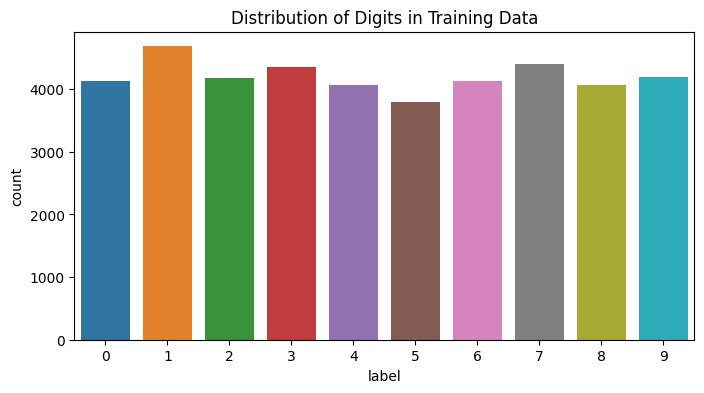

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load Data
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# EDA - Distribution of Digits
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=train_df)
plt.title("Distribution of Digits in Training Data")
plt.show()

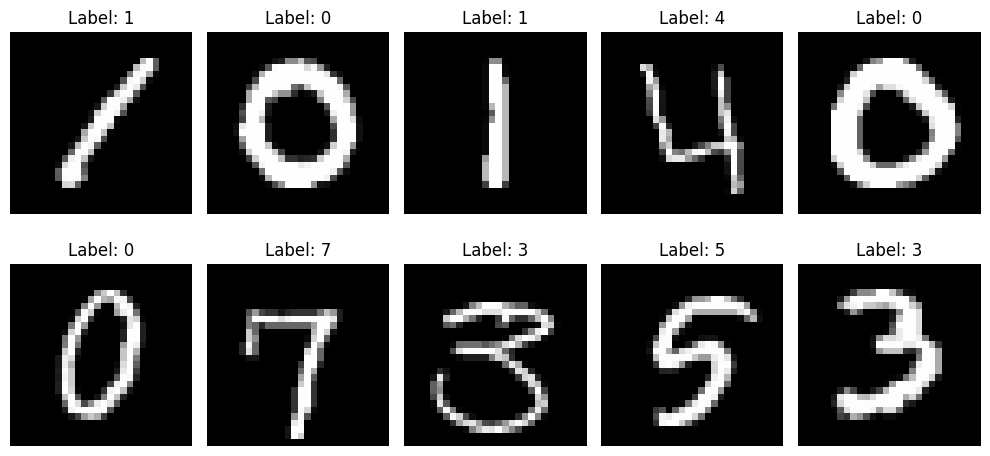

In [2]:
# Show sample digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    img = train_df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {train_df.iloc[i, 0]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# Preprocessing
X = train_df.drop('label', axis=1).values / 255.0  # Normalize
y = train_df['label'].values
X_test = test_df.values / 255.0

# Split data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train KNN
model = KNeighborsClassifier(n_neighbors=3)

start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time
print("Training Time:", training_time)

Training Time: 0.030409812927246094


In [5]:
# Validation Predictions
y_pred = model.predict(X_val)

# Accuracy and Report
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print("Classification Report:\n", report)

Validation Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.95      1.00      0.97       909
           2       0.98      0.95      0.96       846
           3       0.97      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.95      0.97      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.97      0.96       893
           8       0.98      0.93      0.95       835
           9       0.95      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



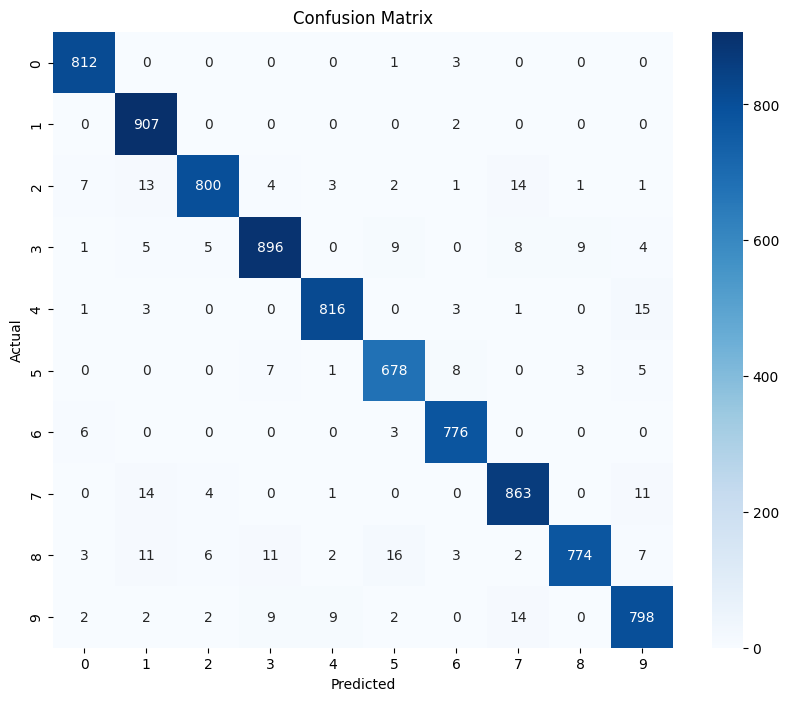

In [6]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


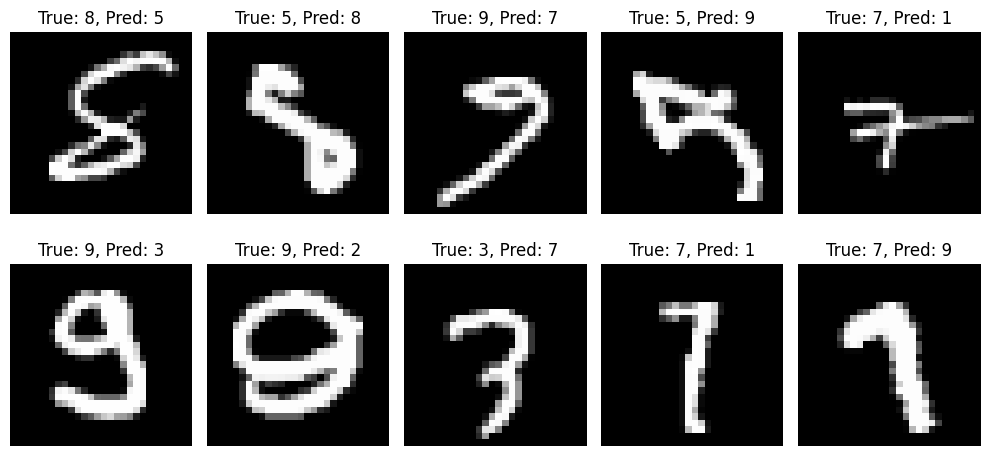

In [7]:
# Misclassified Examples
misclassified_idx = np.where(y_val != y_pred)[0]
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = misclassified_idx[i]
    ax.imshow(X_val[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_val[idx]}, Pred: {y_pred[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Predict on test set
test_preds = model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(test_preds) + 1),
    "Label": test_preds
})
submission.to_csv("submission.csv", index=False)
print("✅ Submission file 'submission.csv' is created!")

✅ Submission file 'submission.csv' is created!
